In [36]:
import pandas as pd # imports the panda library
import matplotlib.pyplot as plt # library for graphing
plt.rcParams['figure.figsize'] = [15, 9]

df2 = pd.read_csv('data/crypto.csv')

<Axes: xlabel='timestamp'>

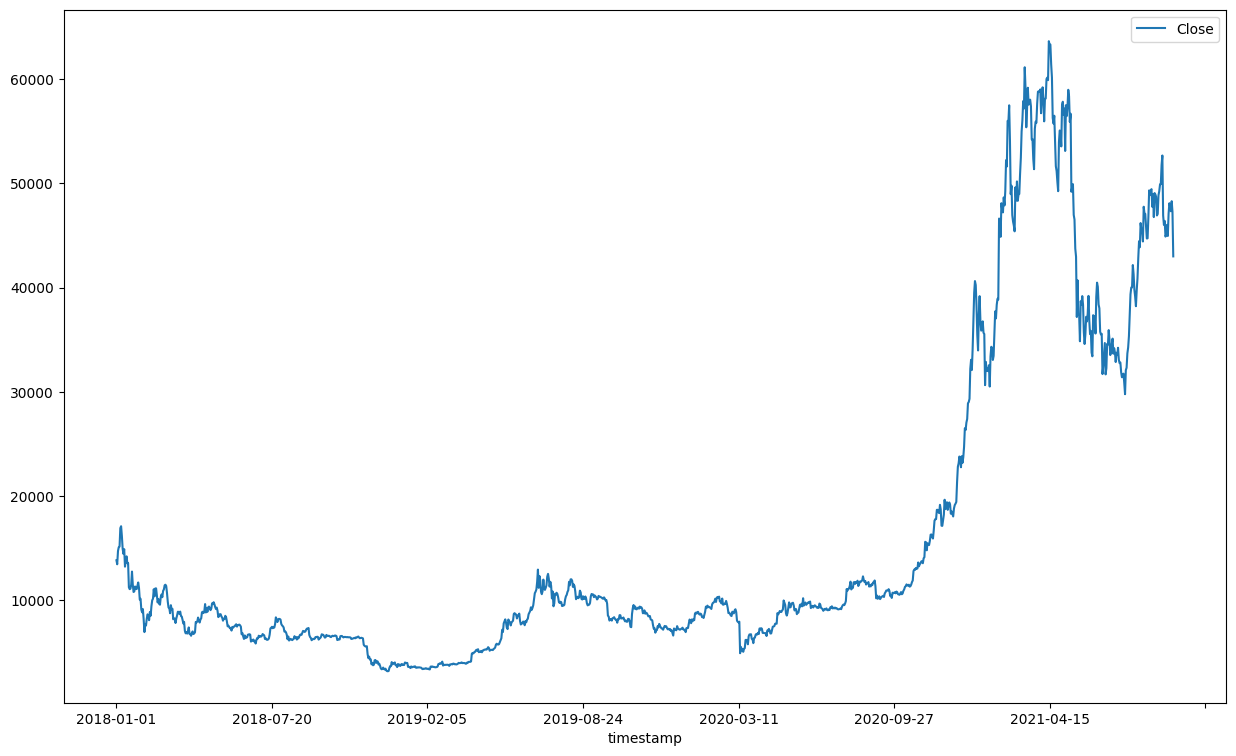

In [4]:
# Bitcoin Graph
bitcoin = df2[df2['Asset_Name'] == 'Bitcoin'] # isolating bitcoin-related data
bitcoin.plot(x='timestamp', y='Close') # close = closing price

<Axes: xlabel='timestamp'>

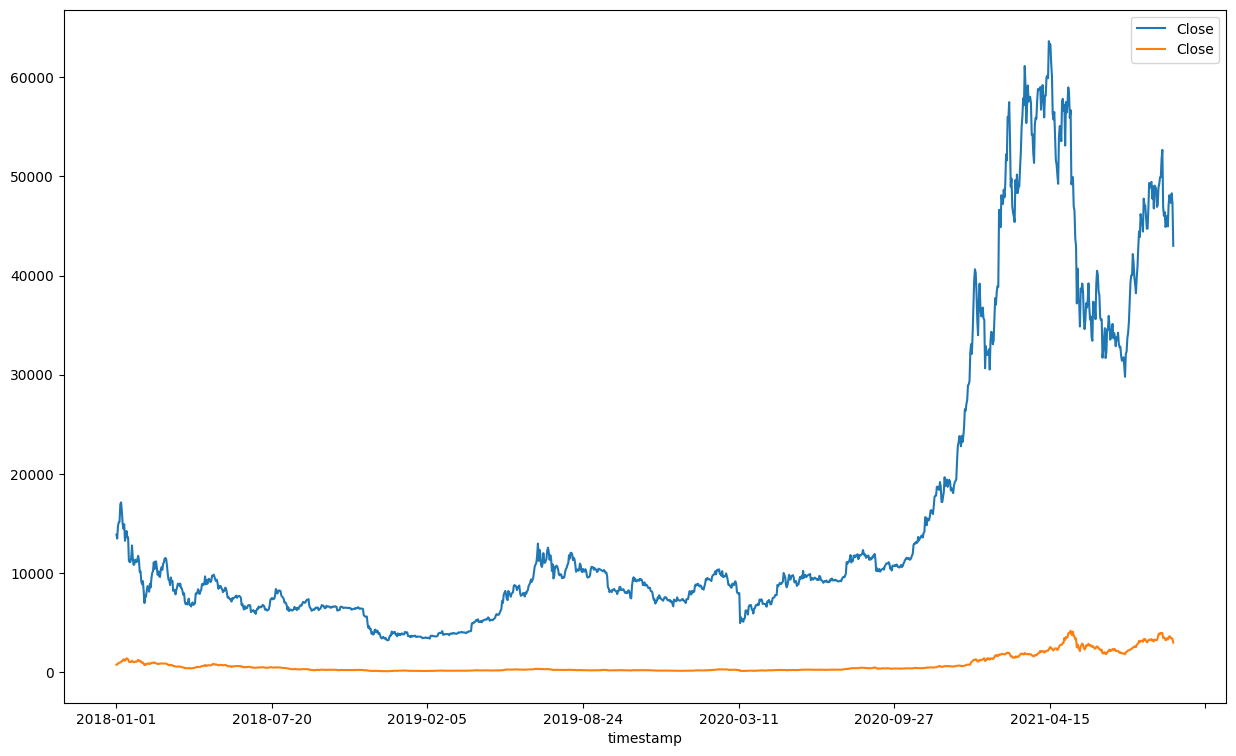

In [5]:
# Question 2d
ax = df2[df2['Asset_Name'] == 'Bitcoin'].plot(x = 'timestamp', y = 'Close')
df2[df2['Asset_Name'] == 'Ethereum'].plot(x = 'timestamp', y = 'Close', ax=ax)

<Axes: xlabel='Asset_Name'>

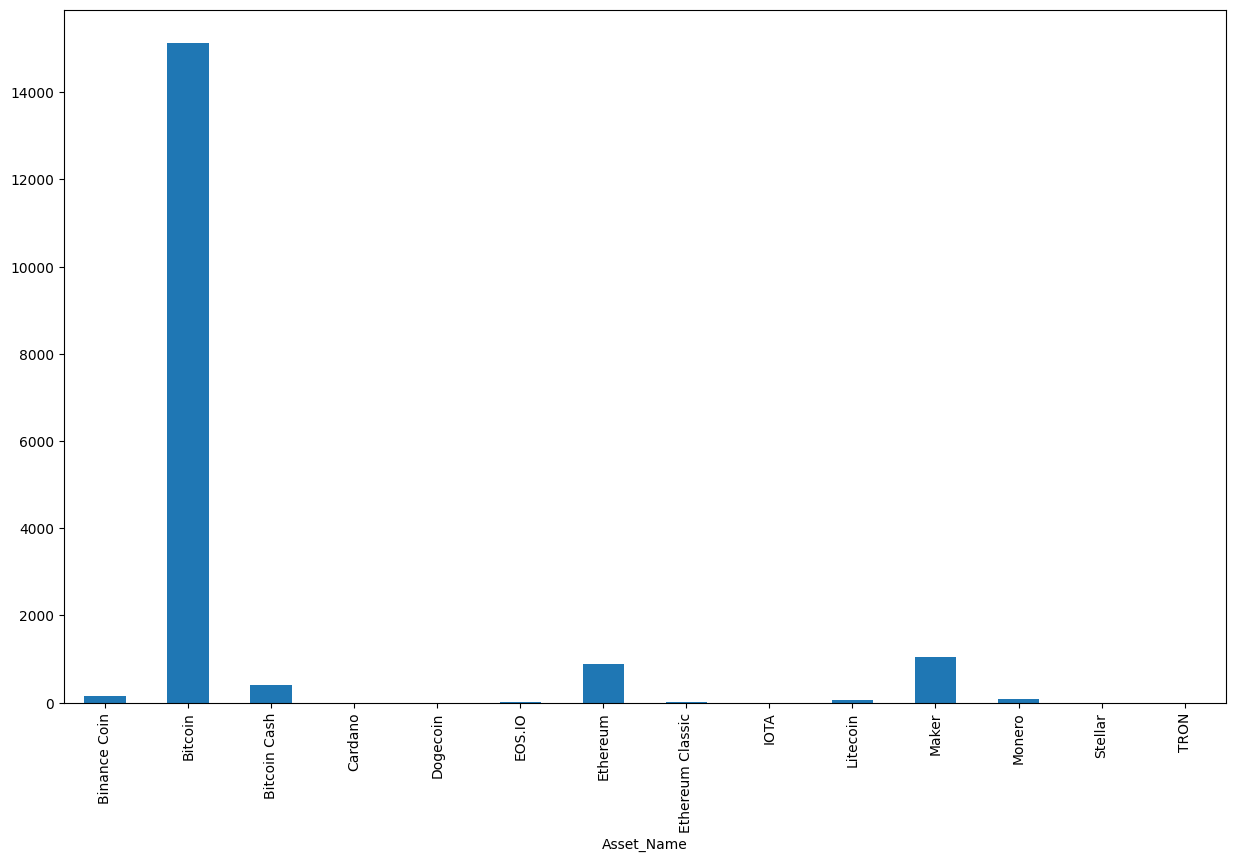

In [17]:
# Question 3
df2.groupby('Asset_Name')['Close'].std().plot.bar() # groups all the assets and then plots the standard deviation of the closing values

<Axes: xlabel='timestamp'>

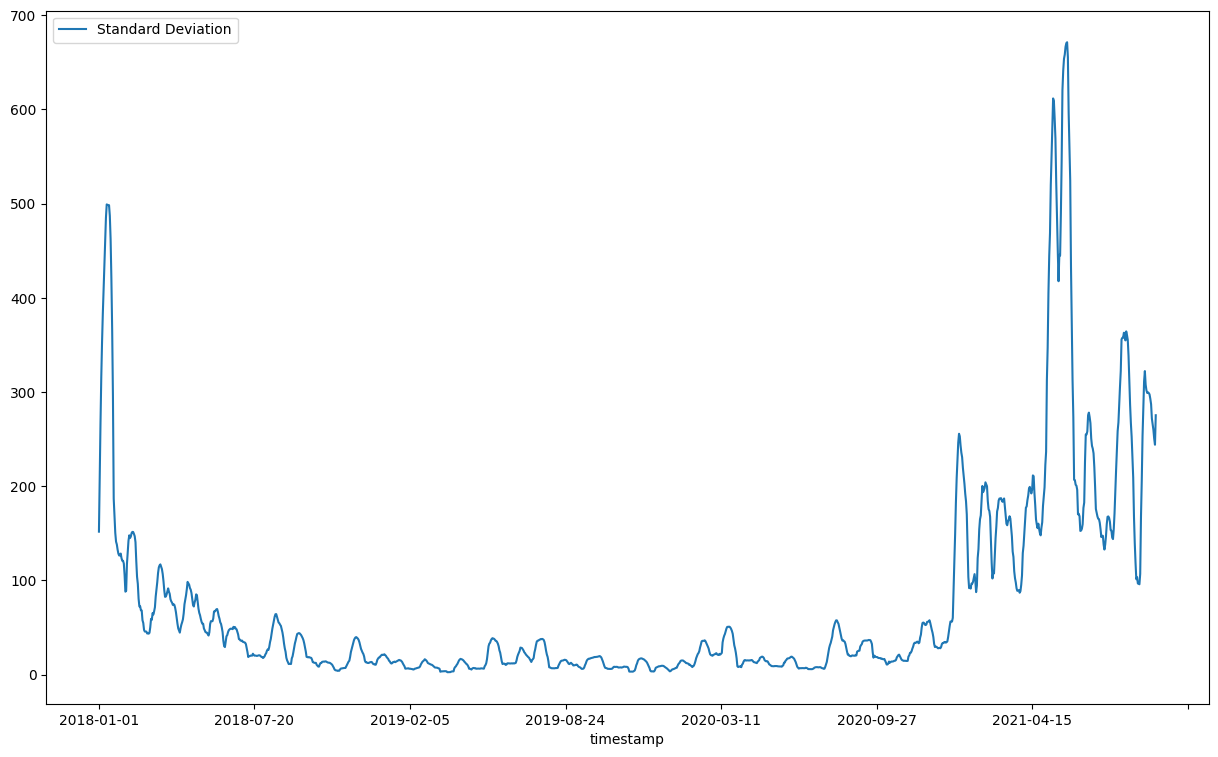

In [28]:
# Question 3b
df2['Standard Deviation'] = df2['Close'].rolling(20).std() # Rolling S.D.
ethereum = df2[df2['Asset_Name'] == 'Ethereum']
ethereum.plot(x = 'timestamp', y = 'Standard Deviation')

<Axes: xlabel='timestamp'>

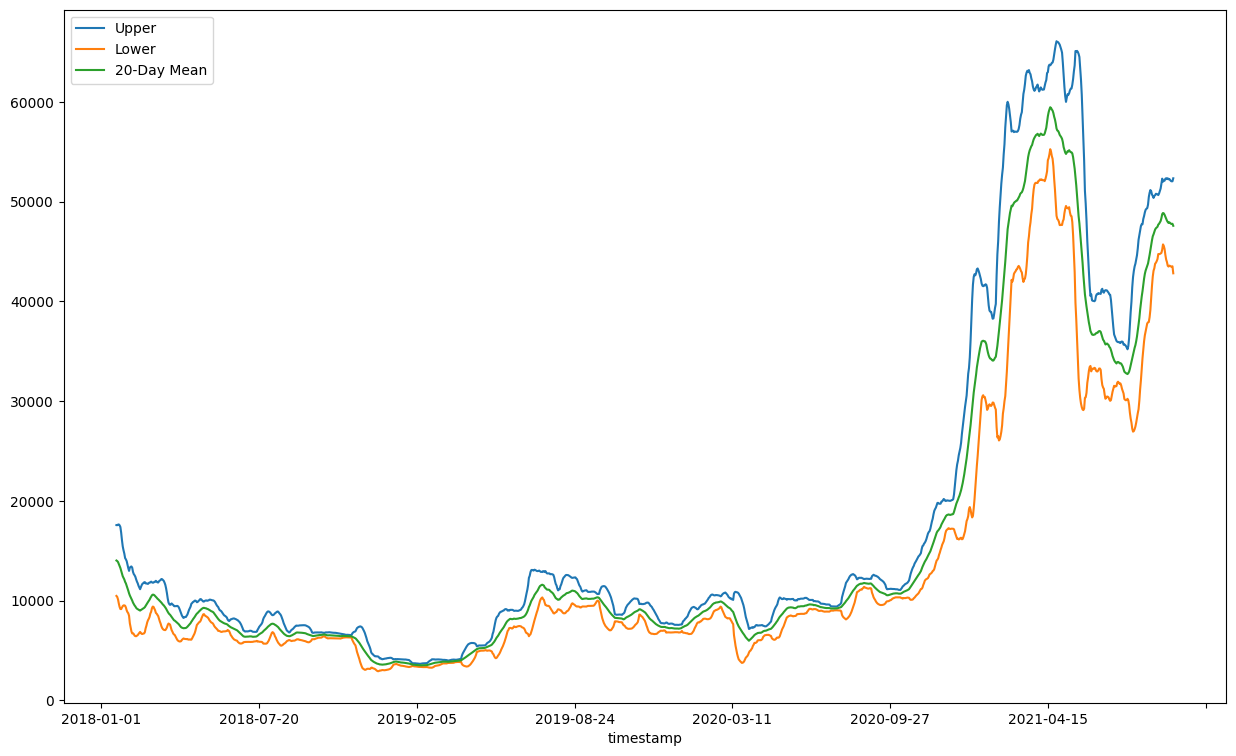

In [42]:
# Bollinger Bands (Bitcoin)
bitcoin_df = df2[df2['Asset_Name' ]== "Bitcoin"].copy()
bitcoin_df['20-Day Mean'] = bitcoin_df['Close'].rolling(20).mean() # Rolling average
bitcoin_df['Standard Deviation'] = bitcoin_df['Close'].rolling(20).std() # Rolling average
bitcoin_df['Upper'] = bitcoin_df['20-Day Mean'] + (bitcoin_df['Standard Deviation'] * 2)
bitcoin_df['Lower'] = bitcoin_df['20-Day Mean'] - (bitcoin_df['Standard Deviation'] * 2)

#df2.set_index('timestamp', inplace = True)
bitcoin_df.plot(x='timestamp', y = ['Upper', 'Lower', '20-Day Mean'])